<a href="https://colab.research.google.com/github/guggg/titanic-analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
import pandas as pd
import numpy as np

test = 'https://drive.google.com/file/d/1xYq21Ia5bxHLLJ-JVp9IsXdtvdmVLNQ5/view?usp=sharing'
train = 'https://drive.google.com/file/d/1eEnbJlNXgV6yF5Hg3-FGjJ8ncW9jMl4l/view?usp=sharing'
testId = '1xYq21Ia5bxHLLJ-JVp9IsXdtvdmVLNQ5'
trainId = '1eEnbJlNXgV6yF5Hg3-FGjJ8ncW9jMl4l'

downloaded = drive.CreateFile({'id':testId}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')  
df_test = pd.read_csv('test.csv') 

downloaded = drive.CreateFile({'id':trainId}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')
df_train = pd.read_csv('train.csv')


In [ ]:
print(df_train.columns)
print(df_test.columns)

# 找到不一樣的欄位
print(set(df_train.columns) - set(df_test.columns))

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['Sex'] = labelencoder.fit_transform(df_train['Sex'])

In [ ]:
# 找missing_value
df_train.info()
df_train.isnull().any()

# 補missing_value
df_train_imputed = df_train.fillna(0)

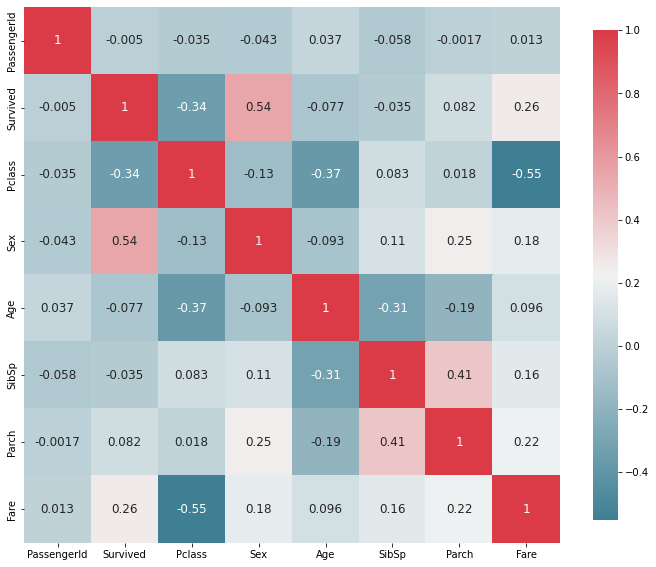

In [51]:
# 熱地圖 查看欄位correlation
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    cbar_kws={'shrink': 0.9},
    ax = plt.subplots(figsize=(12,10))[1],
    annot = True,
    annot_kws = {'fontsize': 12}
)

In [40]:
# columns_x = set(df_train.columns) - {'Survived'}
columns_x = {'Pclass', 'Age', 'PassengerId', 'Fare', 'Parch', 'SibSp', 'Sex'}
columns_y = ['Survived']

# 切分訓練資料、測試資料
train_X = df_train_imputed.loc[:800, columns_x]
train_y = df_train_imputed.loc[:800, columns_y]
valid_X = df_train_imputed.loc[800:, columns_x]
valid_y = df_train_imputed.loc[800:, columns_y]
# print(train_X.shape)
# print(train_y.shape)
# print(valid_X.shape)
# print(valid_y.shape)

In [ ]:
# sklearn切法
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(df_train[columns_x], df_train[columns_y], train_size = .7)

In [ ]:
# sklearn 訓練
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0)
log.fit(train_X, train_y)
pred_y = log.predict(valid_X)

In [50]:
# score = round(log.score(train_X, train_y) * 100 , 2)

from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state = 0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(), cv=5, scoring='accuracy')
scores

array([0.79503106, 0.775     , 0.79375   , 0.7625    , 0.7875    ])